## Five Main Steps for selecting a classifier:
   - Selecting features and collecting labeled training examples
   - Choosing performance metric
   - Choosing a learning algorithm and training a model
   - Evaluating  the performance of the model
   - Changing the settings of the algorithm and tuning the model

# Perceptron Classifier Algorithm

In [2]:
#implementing perceptron rule and Adaline with Scikit learn
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))


Class labels: [0 1 2]


## To evaluate hgow well a trained model performs on unseen data, we split data set into separate training and test datasets.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state= 1, stratify = y #stratify makes all y values occur at the same proportions
)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #StandardScaler is used for feature scaling.
sc.fit(X_train) # calculates the mean and standard deviation
X_train_std = sc.transform(X_train) #standardizes the data with the mean and standard deviation
X_test_std = sc.transform(X_test) #standardizes the data with the mean and standard deviation

In [14]:
#checking our training model and caluclating it's accuracy
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

#checking the misclassifcation
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' %(y_test != y_pred).sum())

#checking the model accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

#alternative: checking model accuracy using inbuilt perceptron accuracy method
print('Accuracy: %.3f' %ppn.score(X_test_std, y_test))

Misclassified examples: 2
Accuracy: 0.956
Accuracy: 0.956


## Plotting decision regions

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
    #setup marker generator and color map
    markers = ('o','s','^', 'v','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class examples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter( x = X[y == c1,0],
                     y = X[y == c1,1],
                     alpha = 0.8,
                     c = colors[idx],
                     marker = markers[idx],
                     label = f'Class {c1}',
                     edgecolor = 'black'
                   )
    #hihglight test examples
    if test_idx:
        #plot all examples
        X_test, y_test = X[test_idx, :] , y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:,1],
                   c='none', edgecolor='black', alpha=1.0,
                   s=100, label='Test set')
    

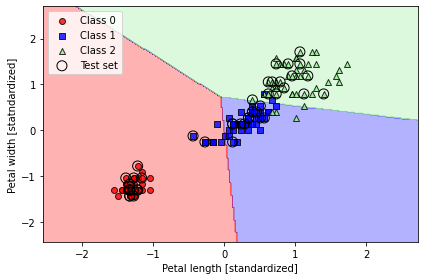

In [18]:
#we can now specify the indices of the examples we want to map on the plot.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [statndardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Inference: Perceptron Classfiers never converges  on datasets that are not perfectly linearly separable.
## Which is why perceptron algorithm is typically not recommended in practice.